In [32]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

import re
import emoji

import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)

#um die häufigsten Wörter im Wahlkampf anzeigen lassen zu können > wird zur tokenisierung etc benötigt
import nltk 
from nltk.corpus import stopwords
from nltk import FreqDist

stop_ger = stopwords.words('german')

In [33]:
#importieren GerVader vom lokalen Dateipfad 

import importlib.util
spec = importlib.util.spec_from_file_location("vaderSentimentGER", "../data/GerVADER-master/vaderSentimentGER.py")
gerVader = importlib.util.module_from_spec(spec)
spec.loader.exec_module(gerVader)


In [34]:
#DataFrames von allen Parteien werden hier eingefügt 
#cdu
df_cdu_raw = pd.read_excel("../data/Parteien/@CDU_user_tweets_bearbeitet.xlsx")
df_cdu_raw.rename(columns={'Text': "original_tweets"}, inplace=True)
# Converting the dataset to pandas DataFrame and renaming the columns 
df_cdu = df_cdu_raw[['Name', 'original_tweets']]

#spd
df_spd_raw = pd.read_excel("../data/Parteien/@spdde_user_tweets_bearbeitet.xlsx")
df_spd_raw.rename(columns={'Text': "original_tweets"}, inplace=True)
df_spd = df_spd_raw[['Name', 'original_tweets']]

#fdp
df_fdp_raw = pd.read_excel("../data/Parteien/@fdp_user_tweets_bearbeitet.xlsx")
df_fdp_raw.rename(columns={'Text': "original_tweets"}, inplace=True)
df_fdp = df_fdp_raw[['Name', 'original_tweets']]

#die Grünen
df_gruene_raw = pd.read_excel("../data/Parteien/@Die_Gruenen_user_tweets_bearbeitet.xlsx")
df_gruene_raw.rename(columns={'Text': "original_tweets"}, inplace=True)
df_gruene = df_gruene_raw[['Name', 'original_tweets']]

#Die Linken 
df_linke_raw = pd.read_excel("../data/Parteien/@dieLinke_user_tweets_bearbeitet.xlsx")
df_linke_raw.rename(columns={'Text': "original_tweets"}, inplace=True)
df_linke = df_linke_raw[['Name', 'original_tweets']]

#AfD
df_afd_raw = pd.read_excel("../data/Parteien/@AfD_user_tweets_bearbeitet.xlsx")
df_afd_raw.rename(columns={'Text': "original_tweets"}, inplace=True)
df_afd = df_afd_raw[['Name', 'original_tweets']]

#CSU
df_csu_raw = pd.read_excel("../data/Parteien/@CSU_user_tweets_bearbeitet.xlsx")
df_csu_raw.rename(columns={'Text': "original_tweets"}, inplace=True)
df_csu = df_csu_raw[['Name', 'original_tweets']]

In [35]:
#Zusammenfügen der dataframes für Gesamtanalayse
#df_all_parties = pd.concat([df_cdu_raw, df_spd_raw], axis=0)
df_all_parties_raw = df_cdu.append(df_spd_raw, ignore_index=True)
df_all_parties_raw = df_all_parties_raw.append(df_fdp_raw, ignore_index=True)
df_all_parties_raw = df_all_parties_raw.append(df_gruene_raw, ignore_index=True)
df_all_parties_raw = df_all_parties_raw.append(df_linke_raw, ignore_index=True)
df_all_parties_raw = df_all_parties_raw.append(df_afd_raw, ignore_index=True)
df_all_parties_raw = df_all_parties_raw.append(df_csu_raw, ignore_index=True)

df_all_parties = df_all_parties_raw[['Name', 'original_tweets']]

In [36]:
analyzer = gerVader.SentimentIntensityAnalyzer()

In [37]:
df_all_parties

,Name,original_tweets
0,CDU,".@ArminLaschet in der #BerlinerRunde: „Die Zeit die vor uns liegt, braucht als erstes wirtschaftliche Stärke &amp; Stabilität, marktwirtschaftliche Lösungen und einen großen Schub in der Verwaltung des Landes, der Digitalisierung sowie im Klimaschutz!“"
1,CDU,Jetzt live: Statement von @ArminLaschet am Wahlabend der #btw21.\n https://t.co/BjbG8lb8aG
2,CDU,"Wir danken allen Wählerinnen und Wählern, die uns heute ihr Vertrauen geschenkt haben."
3,CDU,"An alle Wahlkämpferinnen und Wahlkämpfer, die bei Regen, Sonne oder Sturm, bei Tag und Nacht, von Tür zu Tür, auf den Marktplätzen oder in den sozialen Medien für eine starke CDU und @ArminLaschet als Bundeskanzler gekämpft haben."
4,CDU,"Es ist ein Kopf-an-Kopf-Rennen und wird ein langer Wahlabend. Zum jetzigen Zeitpunkt kann man noch nicht sagen, wer am Ende die Nase vorn haben wird.\nJetzt möchten wir erst einmal Danke sagen: https://t.co/G87SxsFhQd"
...,...,...
3367,CSU,Gedenkminute im Stadion für die Opfer der entsetzlichen Messerattacke in #Würzburg. Wir sind in Gedanken bei den Familien. https://t.co/vEginx1LxT
3368,CSU,🔵 Jetzt LIVE: die Aufstellung der #CSU-Liste für die Bundestagswahl aus dem Max-Morlock-Stadtion in Nürnberg. ⬇️ https://t.co/yk6Nvr90xW
3369,CSU,".@Markus_Soeder: Ich danke der #Polizei für ihren schnellen Einsatz. Besonders beeindruckt hat mich das Engagement der Bürger! Wir stehen nicht nur den Betroffenen bei, sondern werden alles tun, um so etwas in Zukunft zu verhindern! #Würzburg"
3370,CSU,".@Markus_Soeder: Die Ereignisse von #Würzburg sind unfassbar und schockierend. Wir trauern mit den Opfern, wir bangen, beten und hoffen mit den Angehörigen. In diesen schwierigen Zeiten sind wir alle solidarisch! Ich werde heute #Trauerbeflaggung für #Bayern anordnen."


In [38]:
#um die häufigsten Wörter im Wahlkampf anzeigen zu können 
text = df_all_parties['original_tweets']
stopset = ['amp','RT','https','t','co']+ stopwords.words('german')

tokens = []
sentences = []
for txt in text.values:
    sentences.append(txt.lower())
    tokens.extend([t.lower().strip(":,.!?") for t in txt.split()])

hashtags = [w for w in tokens if w.startswith('#')]
mentions = [w for w in tokens if w.startswith('@')]
links = [w for w in tokens if w.startswith('http') or w.startswith('www')]
filtered_tokens = [w for w in tokens \
                   if not w in stopset \
                   and not w in stop_ger \
                   and w.isalpha() \
                   and not len(w)<3 \
                   and not w in hashtags \
                   and not w in links \
                   and not w in mentions]

In [39]:
freq_dist = nltk.FreqDist(filtered_tokens)
freq_dist

FreqDist({'mehr': 419, 'müssen': 327, 'heute': 287, 'menschen': 268, 'sagt': 265, 'dafür': 263, 'deutschland': 224, 'land': 190, 'geht': 179, 'klar': 179, ...})

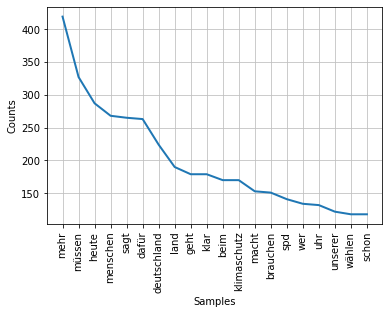

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
freq_dist.plot(20)

In [41]:
#Aufbereitung der Tweet Daten
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #entfernen de Retweets (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #entfernen der Twitter Handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #entfernen von Links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #entfernen von Punktuation, Nummern usw. (keine #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

def give_emoji_free_text(text): #Emojis werden aus den tweets entfernt 
    return emoji.get_emoji_regexp().sub(r'',text)

In [42]:
#Daten bereinigen für Dataframe aller Parteien
df_all_parties['original_tweets'] = df_all_parties['original_tweets'].apply(give_emoji_free_text) 
df_all_parties['Name'] = df_all_parties['Name'].apply(give_emoji_free_text) 
df_all_parties['clean_tweets'] = clean_tweets(df_all_parties['original_tweets'])

In [43]:
#hier werden die scoires berechnet und dem Dataframe hinzugefügt 
scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df_all_parties['clean_tweets'].shape[0]):
    compound = analyzer.polarity_scores(df_all_parties['clean_tweets'][i])["compound"]
    pos = analyzer.polarity_scores(df_all_parties['clean_tweets'][i])["pos"]
    neu = analyzer.polarity_scores(df_all_parties['clean_tweets'][i])["neu"]
    neg = analyzer.polarity_scores(df_all_parties['clean_tweets'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [44]:
#sentiment score für alle Parteien berechnen
sentiments_score = pd.DataFrame.from_dict(scores)
df_all_parties = df_all_parties.join(sentiments_score)
df_all_parties.head(10)

,Name,original_tweets,clean_tweets,Compound,Positive,Negative,Neutral
0,CDU,".@ArminLaschet in der #BerlinerRunde: „Die Zeit die vor uns liegt, braucht als erstes wirtschaftliche Stärke &amp; Stabilität, marktwirtschaftliche Lösungen und einen großen Schub in der Verwaltung des Landes, der Digitalisierung sowie im Klimaschutz!“",". in der #BerlinerRunde: „Die Zeit die vor uns liegt, braucht als erstes wirtschaftliche Stärke &amp; Stabilität, marktwirtschaftliche Lösungen und einen großen Schub in der Verwaltung des Landes, der Digitalisierung sowie im Klimaschutz!“",0.9200,0.343,0.000,0.657
1,CDU,Jetzt live: Statement von @ArminLaschet am Wahlabend der #btw21.\n https://t.co/BjbG8lb8aG,Jetzt live: Statement von am Wahlabend der #btw21.\n,0.0000,0.000,0.000,1.000
2,CDU,"Wir danken allen Wählerinnen und Wählern, die uns heute ihr Vertrauen geschenkt haben.","Wir danken allen Wählerinnen und Wählern, die uns heute ihr Vertrauen geschenkt haben.",0.8591,0.487,0.000,0.513
3,CDU,"An alle Wahlkämpferinnen und Wahlkämpfer, die bei Regen, Sonne oder Sturm, bei Tag und Nacht, von Tür zu Tür, auf den Marktplätzen oder in den sozialen Medien für eine starke CDU und @ArminLaschet als Bundeskanzler gekämpft haben.","An alle Wahlkämpferinnen und Wahlkämpfer, die bei Regen, Sonne oder Sturm, bei Tag und Nacht, von Tür zu Tür, auf den Marktplätzen oder in den sozialen Medien für eine starke CDU und als Bundeskanzler gekämpft haben.",0.1280,0.074,0.061,0.865
4,CDU,"Es ist ein Kopf-an-Kopf-Rennen und wird ein langer Wahlabend. Zum jetzigen Zeitpunkt kann man noch nicht sagen, wer am Ende die Nase vorn haben wird.\nJetzt möchten wir erst einmal Danke sagen: https://t.co/G87SxsFhQd","Es ist ein Kopf-an-Kopf-Rennen und wird ein langer Wahlabend. Zum jetzigen Zeitpunkt kann man noch nicht sagen, wer am Ende die Nase vorn haben wird.\nJetzt möchten wir erst einmal Danke sagen:",0.4939,0.151,0.065,0.784
5,CDU,"Seid dabei beim #CDU-Wahlabend, live aus dem Konrad-Adenauer-Haus. Ab 18.30 Uhr hier auf Twitter. Jetzt schonmal vormerken! ️ https://t.co/Al7oSTR1eY","Seid dabei beim #CDU-Wahlabend, live aus dem Konrad-Adenauer-Haus. Ab 18.30 Uhr hier auf Twitter. Jetzt schonmal vormerken! ️",0.0000,0.000,0.000,1.000
6,CDU,Beide Stimmen für die CDU!\n&amp;\nNoch 24 Stunden bis zur Schließung der Wahllokale.\n#teamcdu #unionstärkstekraft #wegenmorgen https://t.co/GBD1KTinUk,Beide Stimmen für die CDU!\n&amp;\nNoch 24 Stunden bis zur Schließung der Wahllokale.\n#teamcdu #unionstärkstekraft #wegenmorgen,0.0000,0.000,0.000,1.000
7,CDU,Morgen geht es um Deine Zukunft. Um die Zukunft Deiner Kinder. Damit die Richtung stimmt: Beide Stimmen #CDU! #wegenmorgen https://t.co/bAGGHDoDfg,Morgen geht es um Deine Zukunft. Um die Zukunft Deiner Kinder. Damit die Richtung stimmt: Beide Stimmen #CDU! #wegenmorgen,0.0000,0.000,0.000,1.000
8,CDU,Wer Stabilität in Deutschland will: Morgen mit beiden Stimmen #CDU wählen. #wegenmorgen https://t.co/obp88w32x7,Wer Stabilität in Deutschland will: Morgen mit beiden Stimmen #CDU wählen. #wegenmorgen,0.3400,0.179,0.000,0.821
9,CDU,".@ArminLaschet ist bereits über Parteigrenzen als Brückenbauer bekannt. Bundeskanzlerin Angela #Merkel erklärt in Aachen, warum diese Fähigkeit so wichtig ist. #wegenmorgen https://t.co/U6dY2EDAm2",". ist bereits über Parteigrenzen als Brückenbauer bekannt. Bundeskanzlerin Angela #Merkel erklärt in Aachen, warum diese Fähigkeit so wichtig ist. #wegenmorgen",0.8622,0.398,0.000,0.602


In [45]:
df_all_parties['Sentiment']=''
df_all_parties.loc[df_all_parties.Compound>0,'Sentiment']='Positiv'
df_all_parties.loc[df_all_parties.Compound==0,'Sentiment']='Neutral'
df_all_parties.loc[df_all_parties.Compound<0,'Sentiment']='Negativ'

In [46]:
df_all_parties.head(10)

,Name,original_tweets,clean_tweets,Compound,Positive,Negative,Neutral,Sentiment
0,CDU,".@ArminLaschet in der #BerlinerRunde: „Die Zeit die vor uns liegt, braucht als erstes wirtschaftliche Stärke &amp; Stabilität, marktwirtschaftliche Lösungen und einen großen Schub in der Verwaltung des Landes, der Digitalisierung sowie im Klimaschutz!“",". in der #BerlinerRunde: „Die Zeit die vor uns liegt, braucht als erstes wirtschaftliche Stärke &amp; Stabilität, marktwirtschaftliche Lösungen und einen großen Schub in der Verwaltung des Landes, der Digitalisierung sowie im Klimaschutz!“",0.9200,0.343,0.000,0.657,Positiv
1,CDU,Jetzt live: Statement von @ArminLaschet am Wahlabend der #btw21.\n https://t.co/BjbG8lb8aG,Jetzt live: Statement von am Wahlabend der #btw21.\n,0.0000,0.000,0.000,1.000,Neutral
2,CDU,"Wir danken allen Wählerinnen und Wählern, die uns heute ihr Vertrauen geschenkt haben.","Wir danken allen Wählerinnen und Wählern, die uns heute ihr Vertrauen geschenkt haben.",0.8591,0.487,0.000,0.513,Positiv
3,CDU,"An alle Wahlkämpferinnen und Wahlkämpfer, die bei Regen, Sonne oder Sturm, bei Tag und Nacht, von Tür zu Tür, auf den Marktplätzen oder in den sozialen Medien für eine starke CDU und @ArminLaschet als Bundeskanzler gekämpft haben.","An alle Wahlkämpferinnen und Wahlkämpfer, die bei Regen, Sonne oder Sturm, bei Tag und Nacht, von Tür zu Tür, auf den Marktplätzen oder in den sozialen Medien für eine starke CDU und als Bundeskanzler gekämpft haben.",0.1280,0.074,0.061,0.865,Positiv
4,CDU,"Es ist ein Kopf-an-Kopf-Rennen und wird ein langer Wahlabend. Zum jetzigen Zeitpunkt kann man noch nicht sagen, wer am Ende die Nase vorn haben wird.\nJetzt möchten wir erst einmal Danke sagen: https://t.co/G87SxsFhQd","Es ist ein Kopf-an-Kopf-Rennen und wird ein langer Wahlabend. Zum jetzigen Zeitpunkt kann man noch nicht sagen, wer am Ende die Nase vorn haben wird.\nJetzt möchten wir erst einmal Danke sagen:",0.4939,0.151,0.065,0.784,Positiv
5,CDU,"Seid dabei beim #CDU-Wahlabend, live aus dem Konrad-Adenauer-Haus. Ab 18.30 Uhr hier auf Twitter. Jetzt schonmal vormerken! ️ https://t.co/Al7oSTR1eY","Seid dabei beim #CDU-Wahlabend, live aus dem Konrad-Adenauer-Haus. Ab 18.30 Uhr hier auf Twitter. Jetzt schonmal vormerken! ️",0.0000,0.000,0.000,1.000,Neutral
6,CDU,Beide Stimmen für die CDU!\n&amp;\nNoch 24 Stunden bis zur Schließung der Wahllokale.\n#teamcdu #unionstärkstekraft #wegenmorgen https://t.co/GBD1KTinUk,Beide Stimmen für die CDU!\n&amp;\nNoch 24 Stunden bis zur Schließung der Wahllokale.\n#teamcdu #unionstärkstekraft #wegenmorgen,0.0000,0.000,0.000,1.000,Neutral
7,CDU,Morgen geht es um Deine Zukunft. Um die Zukunft Deiner Kinder. Damit die Richtung stimmt: Beide Stimmen #CDU! #wegenmorgen https://t.co/bAGGHDoDfg,Morgen geht es um Deine Zukunft. Um die Zukunft Deiner Kinder. Damit die Richtung stimmt: Beide Stimmen #CDU! #wegenmorgen,0.0000,0.000,0.000,1.000,Neutral
8,CDU,Wer Stabilität in Deutschland will: Morgen mit beiden Stimmen #CDU wählen. #wegenmorgen https://t.co/obp88w32x7,Wer Stabilität in Deutschland will: Morgen mit beiden Stimmen #CDU wählen. #wegenmorgen,0.3400,0.179,0.000,0.821,Positiv
9,CDU,".@ArminLaschet ist bereits über Parteigrenzen als Brückenbauer bekannt. Bundeskanzlerin Angela #Merkel erklärt in Aachen, warum diese Fähigkeit so wichtig ist. #wegenmorgen https://t.co/U6dY2EDAm2",". ist bereits über Parteigrenzen als Brückenbauer bekannt. Bundeskanzlerin Angela #Merkel erklärt in Aachen, warum diese Fähigkeit so wichtig ist. #wegenmorgen",0.8622,0.398,0.000,0.602,Positiv


In [47]:
#Absicherung ob Tweets aller Parteien im betrachteten Dataframe enthalten sind 
df_all_parties.Name.unique()

array(['CDU', 'SPD', 'FDP', 'Die Grünen', 'DIE LINKE', 'AfD', 'CSU'],
      dtype=object)

In [48]:
#Hier werden die Durchschnitts Sentiment Werte der Parteien gebildet 
score_table = df_all_parties.pivot_table(index='Name',  values="Compound", aggfunc = np.mean)
score_table

,Compound
Name,
AfD,0.191318
CDU,0.380766
CSU,0.369600
DIE LINKE,0.192796
Die Grünen,0.382925
FDP,0.358248
SPD,0.405991


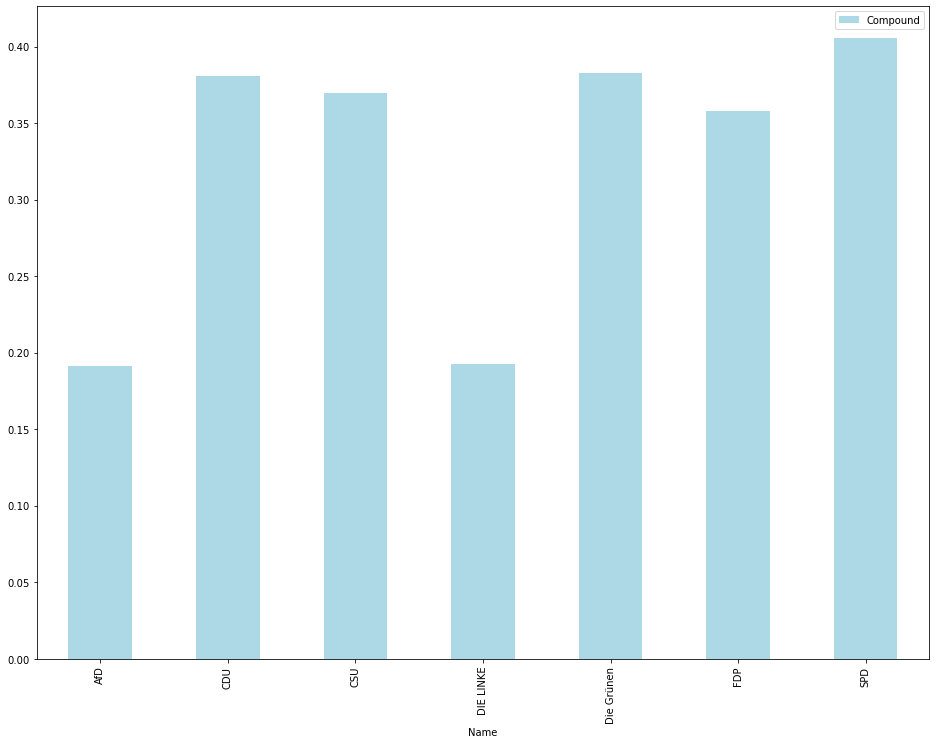

In [49]:
#sie werden geplottet
score_table.plot(kind='bar',color='lightblue',figsize=(16,12))
plt.savefig('../results/sentiment-parteien.jpg',bbox_inches="tight")

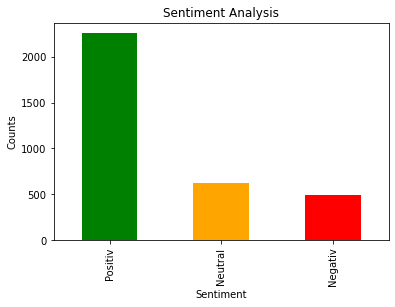

In [52]:
#Anzeigen der Gesamtverteilung des Sentiments über alle Tweets hinweg 

df_all_parties['Sentiment'].value_counts()

#plot and visualize the counts 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_all_parties['Sentiment'].value_counts().plot(kind='bar', color=['Green','orange','red'])
plt.savefig('../results/sentiment_aufteilung.jpg',bbox_inches="tight")
plt.show()


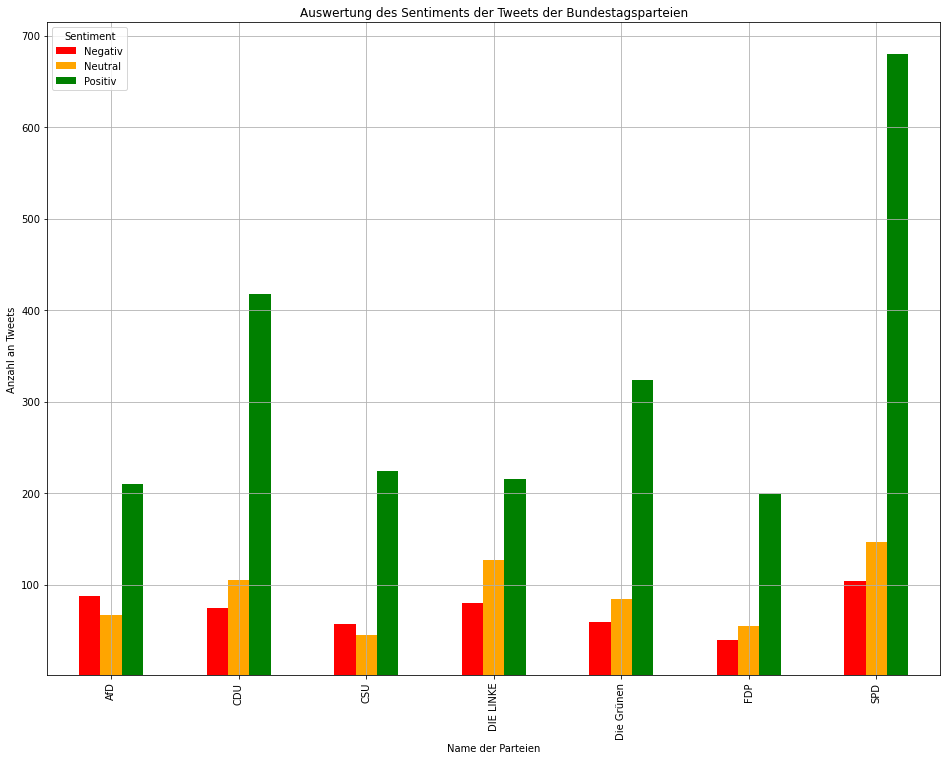

In [50]:
#Die Sentiment-Verteilung > Positiv/Neutral/Negativ > alle Parteien werden gegenübergestellt
from matplotlib.pyplot import figure

all_parties_sentiment = df_all_parties.groupby(['Name','Sentiment']).Sentiment.count().unstack()
#plt.figure(figsize=(10,10))
#plt.grid(True)
all_parties_sentiment.plot(grid=True, kind='bar', color=['red', 'orange', 'green'], figsize=(16,12), title='Auswertung des Sentiments der Tweets der Bundestagsparteien', ylabel="Anzahl an Tweets",xlabel="Name der Parteien", bottom=1.5)

plt.savefig('../results/sentiment_aufteilung_aller_parteien.jpg',bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

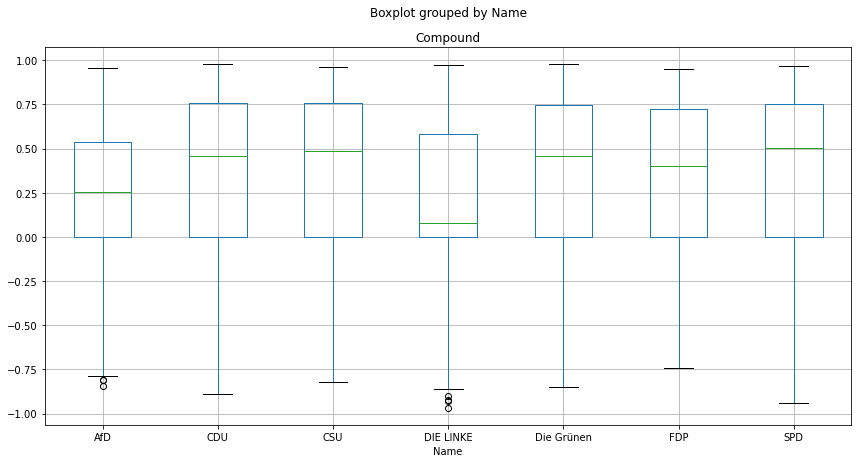

In [28]:
#Erstellen eines Boxplots um die Streuung der Sentiment Scores besser beurteilen zu können 
data = df_all_parties
myFig = plt.figure();
bp = data.boxplot(column='Compound',by='Name',figsize =(14, 7))
plt.savefig('../results/boxplot_sentiment_aller_parteien.jpg', bbox_inches='tight')
plt.show()


# Zusätzliche Visualisierungen


In [24]:
tweetsCategories = df_all_parties.groupby('Sentiment')

positiveTweets = pd.DataFrame()
negativeTweets = pd.DataFrame()
neutralTweets = pd.DataFrame()

for catName,tweetCategory in tweetsCategories:
    if catName == 'Positiv':
        positiveTweets = tweetCategory
    elif catName == 'Negativ':
        negativeTweets = tweetCategory
    elif catName == 'Neutral':
        neutralTweets = tweetCategory

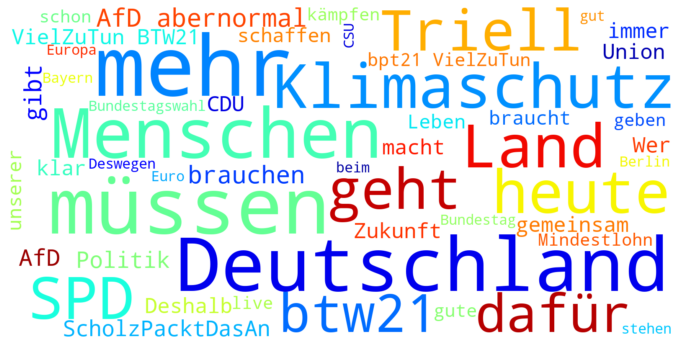

In [21]:
# Wordclouds werden erstellt um einen Überlick über die Daten zu gewinnen 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stopset = ['amp','RT','https','t','co','sagt']+ stopwords.words('german')

def word_cloud(wd_list):
    stopwords = stopset
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df_all_parties['clean_tweets'])
plt.savefig('../results/wordloud__tweets_aller_parteien.jpg',bbox_inches="tight")

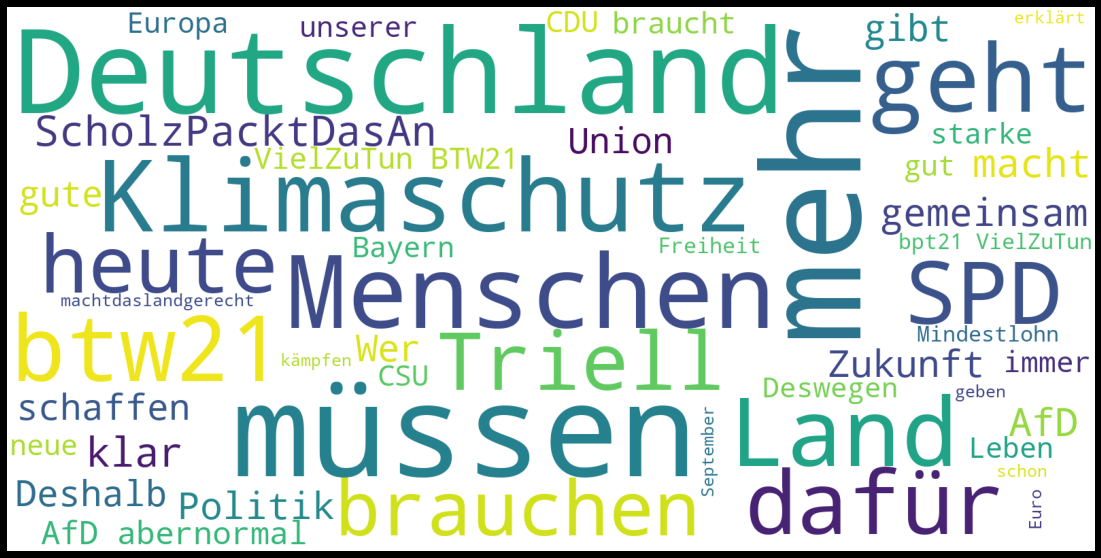

In [25]:
#Weitere Wordclouds für positive Tweets und Negative Tweets werden jeweils erstellt
        
positiveText = ' '.join(positiveTweets['clean_tweets'].tolist())

wordcloud = WordCloud(stopwords = stopset, 
                     background_color="white",
                      width=1600, 
                      height=800,
                      max_words=50,
                      max_font_size=200
                     ).generate(positiveText)
# Open a plot of the generated image.


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
#save the image
plt.savefig('../results/wordcloud_positive_wörter.png', facecolor='k', bbox_inches='tight')

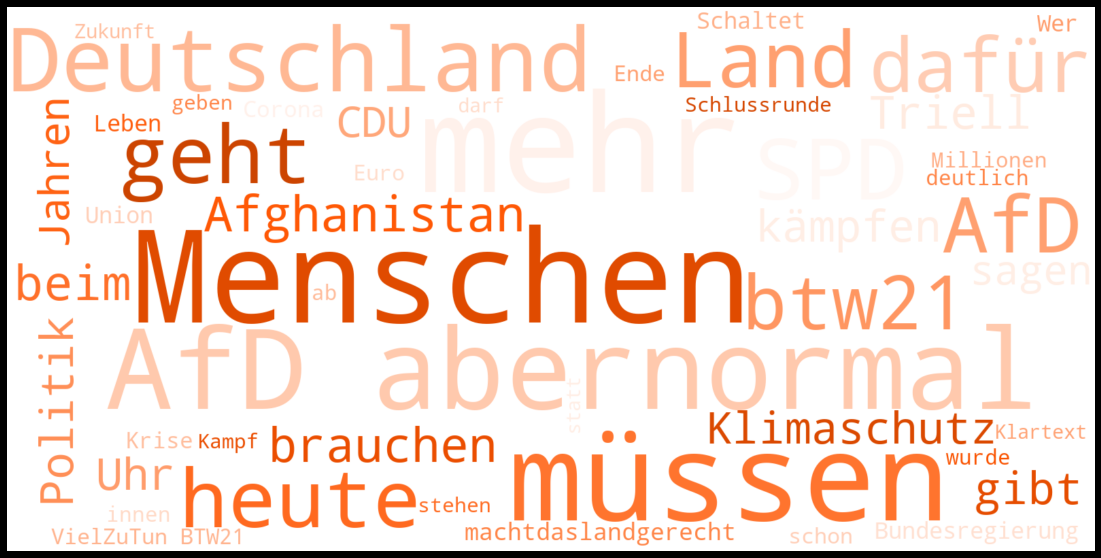

In [29]:
import random

def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(20, 100%%, %d%%)" % random.randint(40, 100)

negativeText = ' '.join(negativeTweets['clean_tweets'].tolist())

wordcloud = WordCloud(stopwords = stopset, 
                     background_color="white",
                      width=1600, 
                      height=800,
                      max_words=50,
                      max_font_size=200
                     ).generate(negativeText)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3),
interpolation="bilinear")
plt.axis("off")
#save the image
plt.savefig('../results/wordcloud_negative_wörter.png', facecolor='k', bbox_inches='tight')

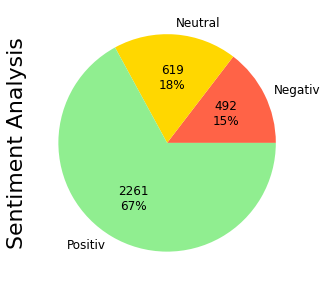

In [27]:
#die Prozentuale Verteilung des Sentiments der Tweets wird betrachtet
def label_function(val):
    return f'{val / 100 * len(df_all_parties):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

df_all_parties.groupby('Sentiment').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                  colors=['tomato', 'gold', 'lightgreen'], ax=ax1)

ax1.set_ylabel('Sentiment Analysis', size=22)
plt.savefig('../results/sentiment_porzentual.jpg', facecolor='k', bbox_inches='tight')
plt.show()

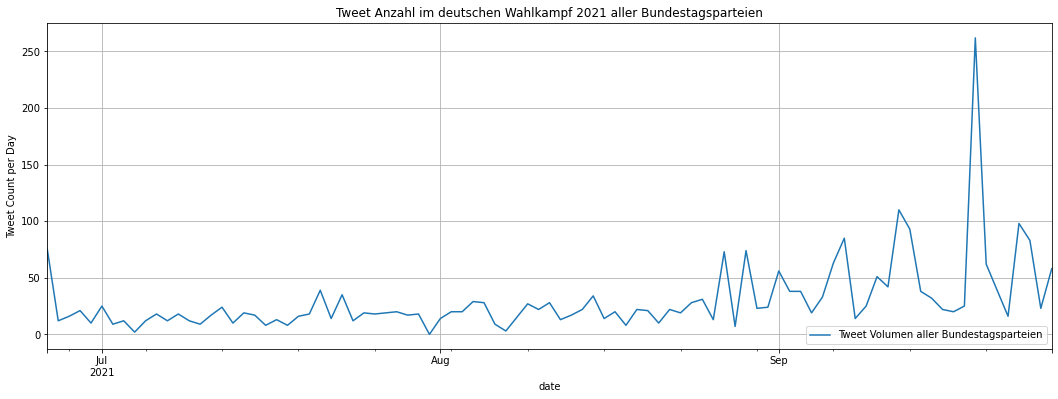

In [31]:
#hier wird die Anzahl der Tweets in im Laufe der Zeit dargestellt 
from matplotlib import pyplot as plt



df_all_parties_raw['date'] = pd.to_datetime(df_all_parties_raw['UTC'])
tweet_df_1day_all_parties = df_all_parties_raw.groupby(pd.Grouper(key='date', freq='D',convention='start')).size()
tweet_df_1day_all_parties.plot(figsize=(18,6),label='Tweet Volumen aller Bundestagsparteien')

#df_cdu_raw['date'] = pd.to_datetime(df_cdu_raw['UTC'])
#tweet_df_1day_cdu = df_cdu_raw.groupby(pd.Grouper(key='date', freq='D',convention='start')).size()
#tweet_df_1day_cdu.plot(figsize=(18,6),label='CDU')

#df_spd_raw['date'] = pd.to_datetime(df_spd_raw['UTC'])
#tweet_df_1day_spd = df_spd_raw.groupby(pd.Grouper(key='date', freq='D',convention='start')).size()
#tweet_df_1day_spd.plot(figsize=(18,6), label='SPD')

#df_fdp_raw['date'] = pd.to_datetime(df_fdp_raw['UTC'])
#tweet_df_1day_fdp = df_fdp_raw.groupby(pd.Grouper(key='date', freq='D',convention='start')).size()
#tweet_df_1day_fdp.plot(figsize=(18,6),label='FDP')

#df_afd_raw['date'] = pd.to_datetime(df_afd_raw['UTC'])
#tweet_df_1day_afd = df_afd_raw.groupby(pd.Grouper(key='date', freq='D',convention='start')).size()
#tweet_df_1day_afd.plot(figsize=(18,6),label='AFD')

#df_gruene_raw['date'] = pd.to_datetime(df_gruene_raw['UTC'])
#tweet_df_1day_gruene = df_gruene_raw.groupby(pd.Grouper(key='date', freq='D',convention='start')).size()
#tweet_df_1day_gruene.plot(figsize=(18,6),label='Die Grünen')

#df_linke_raw['date'] = pd.to_datetime(df_linke_raw['UTC'])
#tweet_df_1day_linke = df_linke_raw.groupby(pd.Grouper(key='date', freq='D',convention='start')).size()
#tweet_df_1day_linke.plot(figsize=(18,6),label='Die Linken')

#df_csu_raw['date'] = pd.to_datetime(df_csu_raw['UTC'])
#tweet_df_1day_csu = df_csu_raw.groupby(pd.Grouper(key='date', freq='D',convention='start')).size()
#tweet_df_1day_csu.plot(figsize=(18,6),label='CSU')


plt.ylabel('Tweet Count per Day')
plt.title('Tweet Anzahl im deutschen Wahlkampf 2021 aller Bundestagsparteien')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('../results/tweet_anzahl_parteien.jpg',bbox_inches="tight")